# $\mathsf{CosmoFlow}$ Performances (two-field theory)

<div class="alert alert-block alert-info"> Please reach out to the developers if you have questions! Your questions and feedback are very valuable to us. </div>

In [7]:
# Import the standard Python packages
import numpy as np
import matplotlib.pyplot as plt
import time # Record the running time

# Import CosmoFlow modules (they must be located in the same parent folder as this notebook)
from Parameters import parameters
from Theory import theory
from Solver import solver

In [8]:
# Define the numerical i\epsilon prescription
def adiabatic(N_load, DeltaN, N_exit):
    return (np.tanh((N_load - N_exit + DeltaN - 0.5)/0.1) + 1)/2

## Number of massless $e$-folds

In [40]:
def massless_efolds(DeltaN):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-15, 20, n) # Time grid array in e-folds for the parameters
    
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = 100*k, 100*k, k # Kinematic configuration for 3-pt function
    N_exit = 0
    
    # Theory 
    H_load = np.ones(n) # Hubble scale
    cs_load = 1 * np.ones(n) # Speed of sound for phi
    m_load = 2 * np.ones(n) # Mass of Psi
    rho_load = 0.1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Linear mixing strength
    lambda1_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Single-exchange coupling
    lambda2_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Double-exchange coupling
    lambda3_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Triple-exchange coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, cs_load, m_load, rho_load, lambda1_load, lambda2_load, lambda3_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters
    
    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 2 # Number of fields
    Rtol, Atol = 1e-3, 1e-50 # Relative and absolute tolerance of the integrator
    Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    start_time = time.time() # Start recording runtime
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    T = time.time() - start_time # Stop time record
    
    return T

In [41]:
n = 20
DeltaN = np.linspace(2, 7, n)
T = np.zeros(n)

start_time = time.time() # Start recording runtime
for i in range(n):
    T[i] = massless_efolds(DeltaN[i])
print("--- %s seconds ---" % (time.time() - start_time)) # Print runtime

# Save files
np.save("DeltaN.npy", DeltaN)
np.save("Runtime_2fields_squeezed.npy", T)

--- 3913.2883429527283 seconds ---


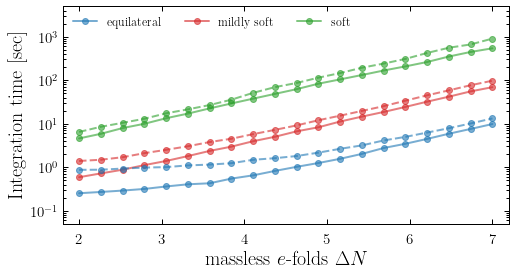

In [51]:
# Import figure style
plt.style.use('sty2.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Load data
DeltaN = np.load("DeltaN.npy")
Runtime_1fields_equilateral = np.load("/Users/deniswerth/Desktop/CosmoFlow/Massless_dphi3/Runtime_1fields_equilateral.npy")
Runtime_1fields_mildlysqueezed = np.load("/Users/deniswerth/Desktop/CosmoFlow/Massless_dphi3/Runtime_1fields_mildlysqueezed.npy")
Runtime_1fields_squeezed = np.load("/Users/deniswerth/Desktop/CosmoFlow/Massless_dphi3/Runtime_1fields_squeezed.npy")
Runtime_2fields_equilateral = np.load("Runtime_2fields_equilateral.npy")
Runtime_2fields_mildlysqueezed = np.load("Runtime_2fields_mildlysqueezed.npy")
Runtime_2fields_squeezed = np.load("Runtime_2fields_squeezed.npy")


# Axis limits
ax.set_xlim([np.min(DeltaN)-0.2, np.max(DeltaN)+0.2])
ax.set_ylim([5e-2, 5e3])

# Plot runtime
ax.semilogy(DeltaN, Runtime_1fields_equilateral, color = "C0", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "equilateral")
ax.semilogy(DeltaN, Runtime_1fields_mildlysqueezed, color = "C1", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "mildly soft")
ax.semilogy(DeltaN, Runtime_1fields_squeezed, color = "C2", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "soft")

ax.semilogy(DeltaN, Runtime_2fields_equilateral, color = "C0", alpha = 0.6, marker = "o", ls = "--", markeredgewidth = 1)
ax.semilogy(DeltaN, Runtime_2fields_mildlysqueezed, color = "C1", alpha = 0.6, marker = "o", ls = "--", markeredgewidth = 1)
ax.semilogy(DeltaN, Runtime_2fields_squeezed, color = "C2", alpha = 0.6, marker = "o", ls = "--", markeredgewidth = 1)


# Labels
ax.set_xlabel(r"massless $e$-folds $\Delta N$")
ax.set_ylabel(r"Integration time [sec]")
ax.legend(ncol = 3, loc = 2)

# Save figure
plt.savefig('Performances_massless_efolds.pdf', bbox_inches = "tight")

## Soft Limit

In [52]:
def soft_limit(kappa):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-15, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 3 # Number of e-folds before horizon crossing
    
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k/kappa, k/kappa, k # Kinematic configuration for 3-pt function
    N_exit = 0
    
    # Theory 
    H_load = np.ones(n) # Hubble scale
    cs_load = 1 * np.ones(n) # Speed of sound for phi
    m_load = 2 * np.ones(n) # Mass of Psi
    rho_load = 0.1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Linear mixing strength
    lambda1_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Single-exchange coupling
    lambda2_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Double-exchange coupling
    lambda3_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Triple-exchange coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, cs_load, m_load, rho_load, lambda1_load, lambda2_load, lambda3_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters
    
    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 2 # Number of fields
    Rtol, Atol = 1e-3, 1e-50 # Relative and absolute tolerance of the integrator
    Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    start_time = time.time() # Start recording runtime
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    T = time.time() - start_time # Stop time record
    
    return T

In [64]:
n = 20
kappa = np.logspace(-3, 1, n)
T = np.zeros(n)

start_time = time.time() # Start recording runtime
for i in range(n):
    T[i] = soft_limit(kappa[i])
print("--- %s seconds ---" % (time.time() - start_time)) # Print runtime

# Save files
np.save("kappa.npy", kappa)
np.save("RuntimeSoft_2fields.npy", T)

--- 463.19745421409607 seconds ---


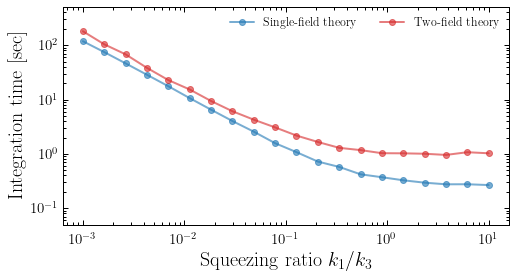

In [69]:
# Import figure style
plt.style.use('sty2.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Load data
kappa = np.load("kappa.npy")
RuntimeSoft_1field = np.load("/Users/deniswerth/Desktop/CosmoFlow/Massless_dphi3/RuntimeSoft_1field.npy")
RuntimeSoft_2fields = np.load("RuntimeSoft_2fields.npy")


# Axis limits
ax.set_ylim([5e-2, 5e2])

# Plot runtime
ax.loglog(kappa, RuntimeSoft_1field, color = "C0", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "Single-field theory")
ax.loglog(kappa, RuntimeSoft_2fields, color = "C1", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "Two-field theory")

# Labels
ax.set_xlabel(r"Squeezing ratio $k_1/k_3$")
ax.set_ylabel(r"Integration time [sec]")
ax.legend(ncol = 2, loc = 1)

# Save figure
plt.savefig('Performances_softlimit.pdf', bbox_inches = "tight")

## Convergence

In [70]:
def convergence(DeltaN, kappa):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-15, 20, n) # Time grid array in e-folds for the parameters
    
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k/kappa, k/kappa, k # Kinematic configuration for 3-pt function
    N_exit = 0
    
    # Theory 
    H_load = np.ones(n) # Hubble scale
    cs_load = 1 * np.ones(n) # Speed of sound for phi
    m_load = 2 * np.ones(n) # Mass of Psi
    rho_load = 0.1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Linear mixing strength
    lambda1_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Single-exchange coupling
    lambda2_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Double-exchange coupling
    lambda3_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Triple-exchange coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, cs_load, m_load, rho_load, lambda1_load, lambda2_load, lambda3_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters
    
    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 2 # Number of fields
    Rtol, Atol = 1e-4, 1e-180 # Relative and absolute tolerance of the integrator
    Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    
    return f[6][0, 0, 0][-1]

In [91]:
n = 20
DeltaN = np.linspace(2, 5, n)
C = np.zeros(n)

start_time = time.time() # Start recording runtime
for i in range(n):
    C[i] = convergence(DeltaN[i], kappa = 1)
print("--- %s seconds ---" % (time.time() - start_time)) # Print runtime

# Save files
np.save("DeltaN_convergence.npy", DeltaN)
np.save("Convergence_2fields_equilateral.npy", C)

--- 96.39004325866699 seconds ---


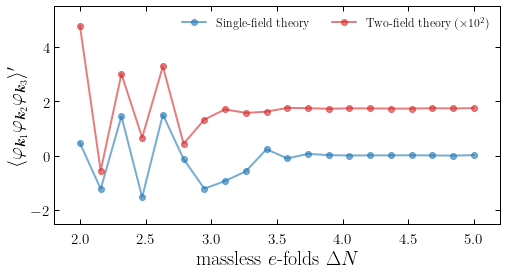

In [177]:
# Import figure style
plt.style.use('sty2.mplstyle')
plt.rc('text.latex', preamble=r"\usepackage{bm}")

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Load data
DeltaN = np.load("DeltaN_convergence.npy")
Convergence_1field_equilateral = np.load("/Users/deniswerth/Desktop/CosmoFlow/Massless_dphi3/Convergence_1field_equilateral.npy")
Convergence_2fields_equilateral = np.load("Convergence_2fields_equilateral.npy")

# Axis limits
ax.set_xlim([np.min(DeltaN)-0.2, np.max(DeltaN)+0.2])
ax.set_ylim([-2.5, 5.5])

# Plot runtime
ax.plot(DeltaN, Convergence_1field_equilateral, color = "C0", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "Single-field theory")
ax.plot(DeltaN, Convergence_2fields_equilateral * 1e2, color = "C1", alpha = 0.6, marker = "o", markeredgewidth = 1, label = "Two-field theory ($\\times 10^2$)")

# Labels
ax.set_xlabel(r"massless $e$-folds $\Delta N$")
ax.set_ylabel(r"$\langle\varphi_{\bm{k}_1} \varphi_{\bm{k}_2} \varphi_{\bm{k}_3}\rangle'$")
ax.legend(ncol = 2, loc = 1)

# Save figure
plt.savefig('Performances_convergence.pdf', bbox_inches = "tight")